## Bilinear Interpolation

### Implement BilinearInterpolation(image, x, y) to compute the linearly interpolated pixel value at (x,y). Both x and y are continuous values. Required: Upsample image ”Moire small.jpg” to be 4 times larger once with nearest neighbor interpolation and save as ”6a.png” and once with bilinear interpolation and save as ”6b.png”.

In [1]:
from scipy.misc import imread
import scipy as sc
from scipy import ndimage
from skimage import filters
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.color import rgb2gray
from scipy.misc import imsave



In [2]:
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            
            
#             for m in range(kernel_h):
#                 for n in range(kernel_w):
#                     sum += kernel[m][n] * image_pad[i-h+m][j-w+n]
            
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]
    
                    

In [3]:
def nearest(image):
    image = imread(image)
    oldImage = np.asarray(image)
    #img = Image.open(image)

    factor = 4

    W, H, C= image.shape

    newW = int(W*factor)
    newH = int(H*factor)
    newImage = np.zeros((oldImage.shape[0]*factor,oldImage.shape[1]*factor,oldImage.shape[2]), dtype=np.float32)
    #print(oldImage.shape)
    #print(newImage.shape)

    for row in range(newW):
        for col in range(newH):
            newImage[row, col] = oldImage[row//4, col//4]
            

    return (newImage.astype(np.uint8))

/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


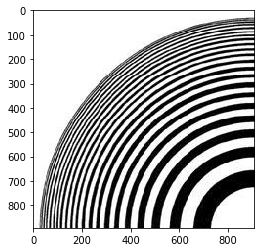

In [4]:
a = nearest('hw1_data/Moire_small.jpg')
plt.imshow(a)
plt.imsave('6a.png', a)

In [5]:
def bilinear(image):
    image = imread(image)
    oldImage = np.asarray(image)
    #img = Image.open(image)

    factor = 4

    W, H, C= image.shape

    newW = int(W*factor)
    newH = int(H*factor)
    newImage_neighbour = np.zeros((oldImage.shape[0]*factor,oldImage.shape[1]*factor,oldImage.shape[2]), dtype=np.float32)
    newImage = np.zeros((oldImage.shape[0]*factor,oldImage.shape[1]*factor,oldImage.shape[2]), dtype=np.float32)
    #print(oldImage.shape)
    #print(newImage.shape)
    for k in range(image.shape[2]):
        for row in range(newW):
            for col in range(newH):
                newImage[row, col, k], newImage_neighbour[row, col, k] = bilinearInter(image[:,:,k], row, col) 
            

    #return plt.imshow(newImage_neighbour.astype(np.uint8))
    return (newImage.astype(np.uint8))

In [6]:
def bilinearInter(image, row, col):
    xx = row//4
    yy = col//4
    return calculate(row,col, image),image[xx][yy]
    

In [7]:
def calculate(row, col, image):
    a = row/4.0 - row//4
    b = col/4.0 - col//4
    #print(a,b)
    row = row//4
    col = col//4
    w = (1-a)*(1-b)*image[row, col]
    
    if row+1 < image.shape[0]:
        w = w +(a *(1-b)*image[row+1, col])
    if col+1 < image.shape[1]:
        w = w + (1-a)*b* image[row, col+1]
    if row+1 < image.shape[0] and col+1 < image.shape[1]:
        w = w +(a*b*image[row+1, col+1])
    return w
    

/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


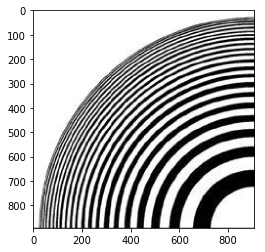

In [8]:
a = bilinear('hw1_data/Moire_small.jpg')
plt.imshow(a)
plt.imsave('6b.png',a)